In [1]:
#Importing the libraries 
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset 
df = pd.read_csv("C:/Users/ativs/OneDrive/Desktop/AI job market insights file.csv")

In [5]:
#Cleaning the dataset 
df.columns = df.columns.str.strip()  #Stripping the column names 
df.rename(columns={"Salary":"Raw Salary"},inplace=True) #Renaming salary column

In [7]:
#Cleaning the salary column
df["Salary"] = df["Raw Salary"].str.replace("?","",regex=False)
df["Salary"] = df["Salary"].str.replace(",","")
df["Salary"] = pd.to_numeric(df["Salary"],errors='coerce')

In [13]:
# Add AI job indicator using keywords
ai_keywords = ['artificial intelligence', 'ai', 'machine learning', 'deep learning', 
               'nlp', 'computer vision', 'data science', 'neural networks', 
               'automation', 'robotics', 'ml', 'data analyst', 'data engineer']
def is_ai_related(text):
    text = str(text).lower()
    return any(keyword in text for keyword in ai_keywords)

df["Is_AI_Job"] = df["Job Title"].apply(is_ai_related) | df["Required Skills"].apply(is_ai_related)

In [15]:
#AI job count per industry 
industry_trend = df[df["Is_AI_Job"]].groupby("Industry").size().sort_values(ascending=False)

In [17]:
#AI Job growth projection (Growth vs Decline)
growth_trend = df[df["Is_AI_Job"]].groupby("Job Growth Projection").size()

In [19]:
df_ai = df[df["Is_AI_Job"]].copy().reset_index(drop=True)
df_ai['Index'] = df_ai.index

In [21]:
#Fitting Linear regression model
X = df_ai[['Index']]
y = df_ai['Salary']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
#Predicting Salary trend 
df_ai['Predicted_Salary'] = model.predict(X)

In [25]:
#Forecasting next 20 points 
future_indexes = pd.DataFrame({'Index': np.arange(len(df_ai),len(df_ai)+20)})
future_predictions = model.predict(future_indexes)

C:\Users\ativs\AppData\Local\Temp\ipykernel_16476\1754208029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_trend.values, y=industry_trend.index, palette="coolwarm")


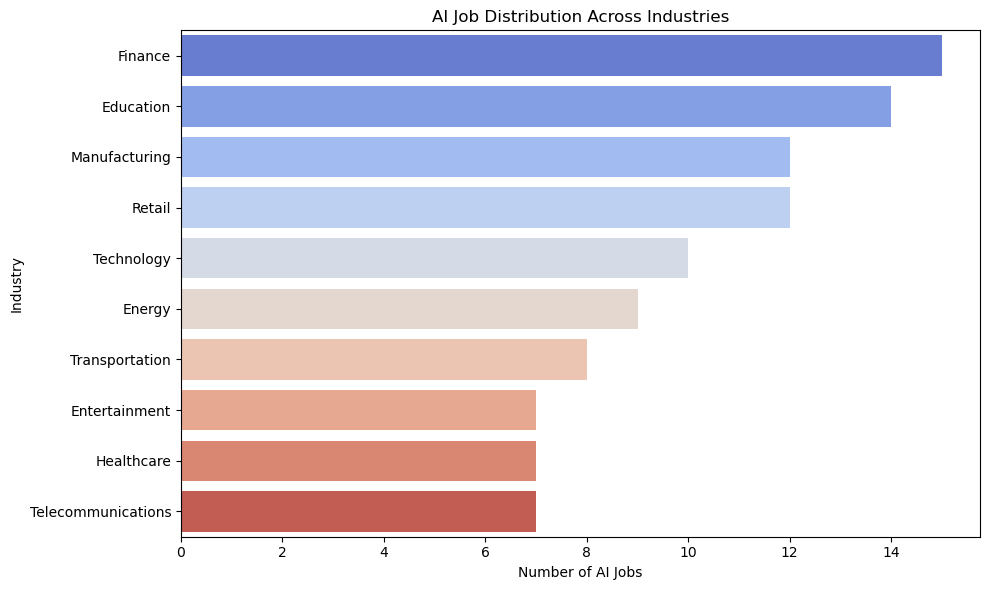

In [27]:
#Bar plot: AI Jobs by industry 
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_trend.values, y=industry_trend.index, palette="coolwarm")
plt.title("AI Job Distribution Across Industries")
plt.xlabel("Number of AI Jobs")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

C:\Users\ativs\AppData\Local\Temp\ipykernel_16476\1126166117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=growth_trend.index, y=growth_trend.values, palette="Set2")


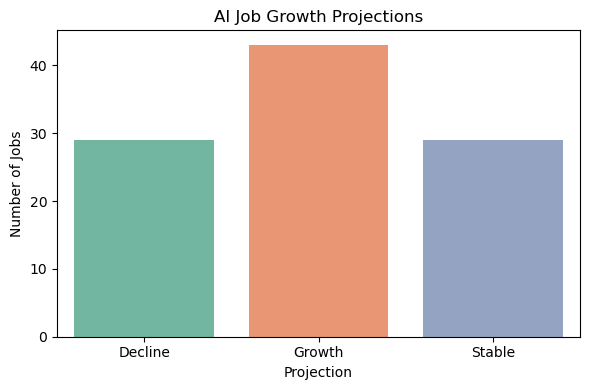

In [29]:
#Bar plot: Growth vs Decline 
plt.figure(figsize=(6, 4))
sns.barplot(x=growth_trend.index, y=growth_trend.values, palette="Set2")
plt.title("AI Job Growth Projections")
plt.xlabel("Projection")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.show()

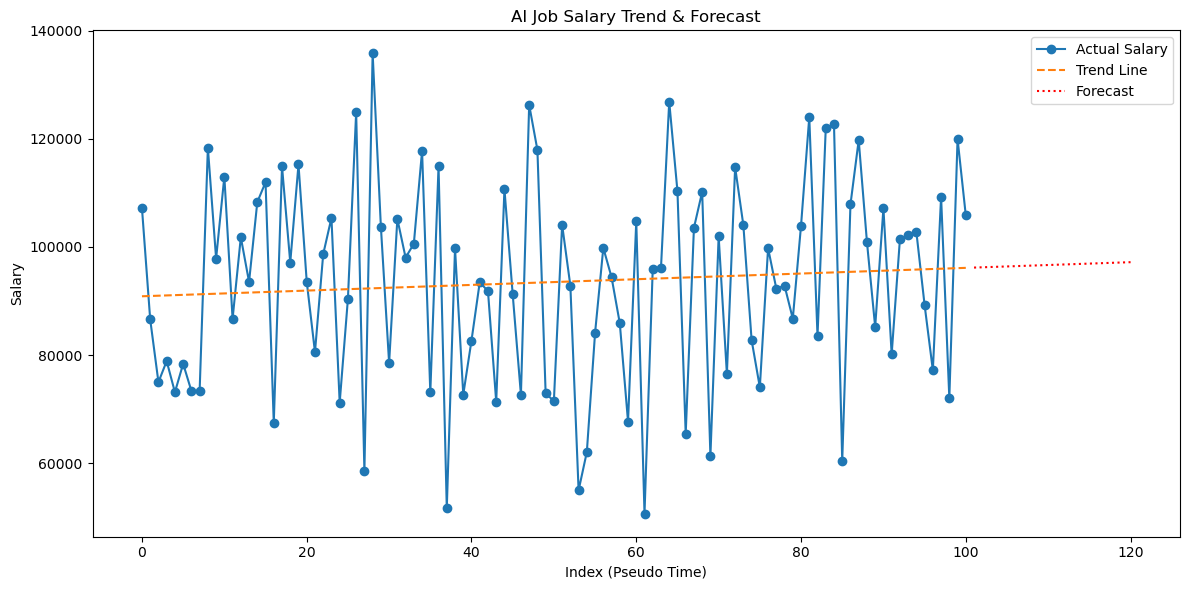

In [31]:
#Salary trend and forecast
plt.figure(figsize=(12, 6))
plt.plot(df_ai['Index'], df_ai['Salary'], label="Actual Salary", marker='o')
plt.plot(df_ai['Index'], df_ai['Predicted_Salary'], label="Trend Line", linestyle='--')
plt.plot(future_indexes['Index'], future_predictions, label="Forecast", linestyle=':', color='red')
plt.title("AI Job Salary Trend & Forecast")
plt.xlabel("Index (Pseudo Time)")
plt.ylabel("Salary")
plt.legend()
plt.tight_layout()
plt.show()